In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

#import all the required libraries.  Must run this or functions will not work


In [2]:
df = pd.read_csv('/Users/Harrison/Desktop/ContactHW.csv')

In [3]:
df.head()

,Survery,Age,ZipCode,Gender,CurrentType,CurrentAcuity,InitialAcuity,AgeFirstRx,Age18Acuity,Age30Acuity,TypeAt30,Changed to glasses contact both Lasik,Age when switched,Did not switch,Switch improve vision?,Regret Switching?,note
0,1,48,95757,F,0,0,150,5,700,700,2,2,14.0,NaN,1.0,No,"contact, lasik"
1,2,48,95829,M,1,425,125,9,325,350,1,0,NaN,x,NaN,NaN,NaN
2,3,47,95831,F,1,600,300,14,350,450,1,1,24.0,NaN,0.0,No,NaN
3,4,76,95829,M,1,550,200,14,300,350,1,0,NaN,x,NaN,NaN,NaN
4,5,47,94502,F,1,600,70,10,400,550,3,3,17.0,NaN,2.0,No,NaN


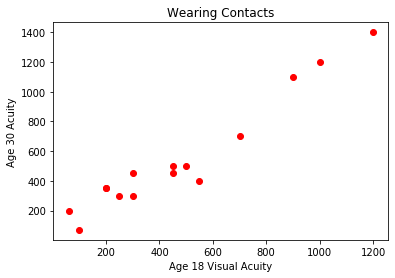

In [14]:
# create a data array only with data with TypeAge30 = 2?

Contact = df.loc[df['TypeAt30'] == 2]

plt.scatter(Contact.Age18Acuity, Contact.Age30Acuity,  color='red')
plt.xlabel("Age 18 Visual Acuity")
plt.ylabel("Age 30 Acuity")
plt.title("Wearing Contacts")
plt.show()

In [22]:
# split data set into train and test sets. 80% for training. 20% for testing
# ~ invert all bits (not function)
msk = np.random.rand(len(df)) < 0.8
train = df  # assign train to random 80% of test data
test = df[~msk]  # assign all data not in msk

#import the model
from sklearn import linear_model

# Train regression model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Age18Acuity']])
train_y = np.asanyarray(train[['Age30Acuity']])
regr.fit (train_x, train_y)

# Print the coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[1.10722283]]
Intercept:  [46.32396061]


Text(0, 0.5, 'Age 30 Vision')

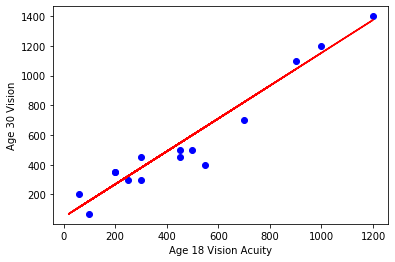

In [24]:
#print the fit line over the data
train = df.loc[df['TypeAt30'] == 2]
#print scatter graph of the data
plt.scatter(train.Age18Acuity, train.Age30Acuity,  color='blue') 

#print the fit line
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

#data label
plt.xlabel("Age 18 Vision Acuity")
plt.ylabel("Age 30 Vision")